#Boston Housing Price

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/boston.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.shape

(506, 14)

In [ ]:
dataset.isnull().sum() # return number of missing values for each variable

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MDEV       0
dtype: int64

In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


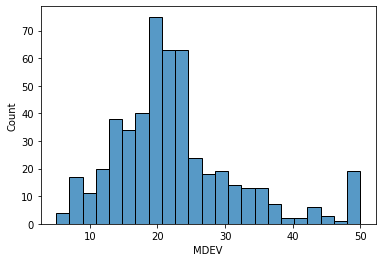

In [ ]:
#histogram of price
sns.histplot(dataset['MDEV'])

##Correlation Matrix

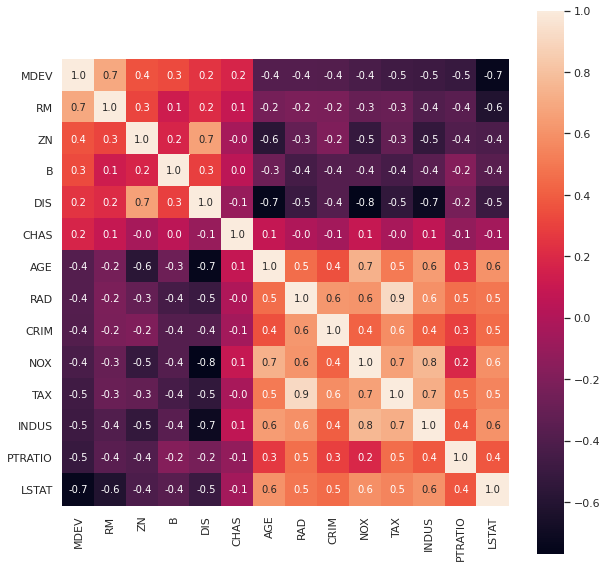

In [ ]:
#price correlation matrix
correlation_matrix = dataset.corr()
k = 14 #number of variables for heatmap
cols = correlation_matrix.nlargest(k,'MDEV')['MDEV'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.01f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,ax=ax)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(correlation_matrix['MDEV'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MDEV       1.000000
Name: MDEV, dtype: float64

we should check the correlation between theses features in order to have independent features.

In [ ]:
print(dataset[["LSTAT","PTRATIO"]].corr())
print(dataset[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


We find out that LSTAT and RM are highly correlated, so we keep one of them that highly correlated with MDEV.

In [ ]:
print(dataset[["RM","MDEV"]].corr())
print(dataset[["MDEV","LSTAT"]].corr())

           RM     MDEV
RM    1.00000  0.69536
MDEV  0.69536  1.00000
           MDEV     LSTAT
MDEV   1.000000 -0.737663
LSTAT -0.737663  1.000000


We keep LSTAT, because it's highly correlated with MDEV.
and we should drop irrelavent columns.

In [ ]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MDEV'],
      dtype='object')

In [ ]:
dataset.drop(labels=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','B'], axis=1, inplace=True) # remove irrelavent columns features
dataset.head()

,PTRATIO,LSTAT,MDEV
0,15.3,4.98,24.0
1,17.8,9.14,21.6
2,17.8,4.03,34.7
3,18.7,2.94,33.4
4,18.7,5.33,36.2


In [ ]:
dataset.describe()

,PTRATIO,LSTAT,MDEV
count,506.000000,506.000000,506.000000
mean,18.455534,12.653063,22.532806
std,2.164946,7.141062,9.197104
min,12.600000,1.730000,5.000000
25%,17.400000,6.950000,17.025000
50%,19.050000,11.360000,21.200000
75%,20.200000,16.955000,25.000000
max,22.000000,37.970000,50.000000


In [ ]:
features = dataset.drop(columns='MDEV')
targets = pd.DataFrame(dataset['MDEV'])

In [ ]:
print(features.shape)
print(targets.shape)

(506, 2)
(506, 1)


Both of these two features have negative correlation with MDEV, so as these features increase, the amount of MDEV decreases

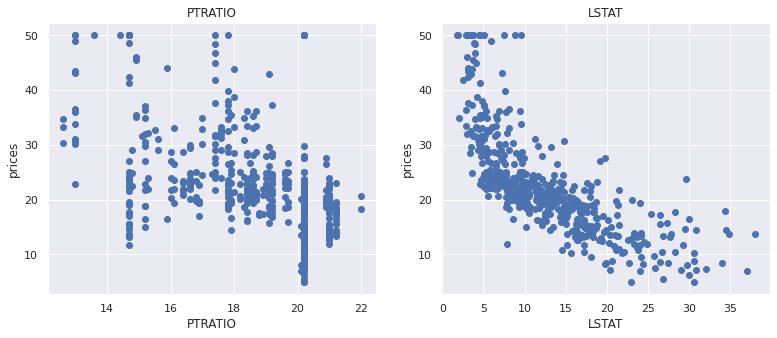

In [ ]:
plt.figure(figsize=(20, 5))

# i: index
for i, col in enumerate(features.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = dataset[col]
    y = targets
    plt.plot(x, y, 'o')
    # Create regression line
    # plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) ///?
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [ ]:
(X_train ,X_test, y_train, y_test) = train_test_split(features, targets, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)
print("type of X_train : ",type(X_train))

X_train :  (404, 2)
X_test :  (102, 2)
y_train :  (404, 1)
y_test :  (102, 1)
type of X_train :  <class 'pandas.core.frame.DataFrame'>


##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.22944106e+00, -9.35437559e-01],
       [-1.02025525e-01, -3.25013957e-01],
       [-1.02025525e-01, -1.07483718e+00],
       [ 3.03844068e-01, -1.23477990e+00],
       [ 3.03844068e-01, -8.84079804e-01],
       [ 3.03844068e-01, -9.01688177e-01],
       [-1.27453768e+00,  1.57748940e-01],
       [-1.27453768e+00,  1.14381784e+00],
       [-1.27453768e+00,  2.72563669e+00],
       [-1.27453768e+00,  8.43008128e-01],
       [-1.27453768e+00,  1.33457521e+00],
       [-1.27453768e+00,  2.81007552e-01],
       [-1.27453768e+00,  6.39044473e-01],
       [ 1.34106636e+00, -4.54142026e-01],
       [ 1.34106636e+00, -1.60669141e-01],
       [ 1.34106636e+00, -4.23327373e-01],
       [ 1.34106636e+00, -7.00659250e-01],
       [ 1.34106636e+00,  4.86438572e-01],
       [ 1.34106636e+00,  4.91639725e-02],
       [ 1.34106636e+00, -1.09979690e-02],
       [ 1.34106636e+00,  1.41821498e+00],
       [ 1.34106636e+00,  3.63179960e-01],
       [ 1.34106636e+00,  1.08072117e+00],
       [ 1.

##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.5611798399289958

In [ ]:
reg.coef_

array([[-2.35572166, -5.85057626]])

In [ ]:
y_test_predict = reg.predict(X_test)
type(y_test_predict)

numpy.ndarray

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_test_predict))

Mean squared error: 16.40
